#### 讀取需要的函式庫

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import clear_output
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns
from func import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jieba
import sys
import re
import os
# re -> \d for number, \s for any space (\t\r\n...) 

#### 定義 addstopword 及 adddict 函式

In [2]:
def addstopword(data):
    stop = []
    if os.path.isfile('./stay.txt'):
        with open('./stay.txt', 'rb') as f:
                text = f.read()
                encode = chardet.detect(text)
        stay = list(map(str.strip, open('./stay.txt', 'r+', encoding=encode['encoding']).readlines()))
    else:
        stay = []
    length = len(data)
    index = 0
    value = ''
    tmp = ''
    while(index != length):
        if data[index] not in stay:
            print(data[index])
            value = input('Add to stop word [y:stopword/n:stayword/q:quit]: ')
            if value == 'y':
                if tmp == 'p': stay.remove(data[index])
                stop.append(data[index])
            elif value == 'n':
                if tmp == 'p': stop.remove(data[index])
                stay.append(data[index])
            elif value == 'p':
                index -= 2
            elif value == 'q':
                break
            clear_output()
        tmp = value
        index += 1
    return stop, stay


def addword():
    word = []
    while(True):
        # clear_output()
        value = input('Add to dictionay word [q:quit]: ')
        if value == 'q':
            break
        else:
            word.append(value)
    return word

#### 讀取資料夾中的資料

In [3]:
#path = '../../107-1PythonSampleCode/week_5/task_5/*.txt'
path = './untitled/*.txt'
title, data = readdir(path)


Number of files : 8


#### 顯示部份資料內容

In [4]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    print(data[i][:10], '...', data[i][-10:-1], sep='\n', end='\n\n')

----Document : 台泥2016----
﻿致股東報告書
 
...
 491 萬立方米

----Document : 台泥2017----
﻿致股東報告書
曾
...

著迷的永恆產業。

----Document : 致股東報告書2016-亞泥----
壹、致股東報告書

...
32 萬公噸。


----Document : 致股東報告書2016-幸福泥----
壹、致股東報告書

...
00~400萬公噸

----Document : 致股東報告書2016-東南水泥----
壹、 致股東報告書
...
謀求公司最大利益。

----Document : 致股東報告書2017-亞泥----
壹、致股東報告書

...
7,059 仟元。

----Document : 致股東報告書2017-幸福泥----
壹、致股東報告書

...
00~300萬公噸

----Document : 致股東報告書2017-東南水泥----
壹、 致股東報告書
...
謀求公司最大利益。



#### 新增詞彙至自定義詞庫，並匯入該詞庫
* savetofile(path, list_like_data)
* example for list_like_data:
  * [['來台']] : 完整 '來台' 字串被存入字典中
  * ['來台'] :　'來台' 視為獨立字元，存入 '來' '台' 於字典中 

In [5]:
# savetofile('./dict.txt', [['來台']])  # 完整字串　'來台'　被存入字典中
jieba.load_userdict('./dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.477 seconds.
Prefix dict has been built succesfully.


#### 新增詞彙至自定義停止詞彙中

In [6]:
stopwords = ['一','二','三','四','五','六','用','淨','利','值','前','據','談','自','至','曾','出',
            '合','最','供','而','個','很','得','達','家','進','所','夏','若','邱','但','中','可',
            '他','我','列','將','對','之','率','已','由','佔','本','日','月','年','另','故','於',
            '較','請','再','經','也','在','依','到','等','或','大','認列','不僅','讓','相關','最終',
            '把','沒','及','過去','認為','為','按','比','仍','係','後','及與','以','時','該','的',
            '並','更','就','註','有','事','來','不','從','堺','權','從','卻','說','要','今','度',
            '手','才','又','其','長','了','百','億','元','例如','可能','由於','因此','土城','一份',
            '上午','這份','多','赴','和','與','是','約','就是','只是','但是','如果','附註','部分',
            '事項','各位','品牌','集團','幅度','資產','新','台幣','日圓','億日圓','機構','面板','日元',
            '企業','報導','媒體','目前','提案','經營','實地','大阪','億元','以及','代工','一步','第二',
            '雙方','方案','分析','接受','成為','事業','目前','高橋','董事','營業','受到','提供','使用',
            '本年','說明','現金','成本','營業外','收入','結轉','分攤','其他','影響財務','詳合','結果',
            '不是','是否','最高','記者','超過','兩家','主幹','我們','除了','自己','立刻','','日本',
            '之間','不過','今天','然而','此外','工廠','預測','如下','之一','附註','附','註','其中',
            '因為','查核','報告增加','會計','相對','仟元','金額','權益','能力利益','股東','合理性',
            '假設','無形','上','開關鍵','模型','支出','控制','計算','資金評估','報告','因應','仟元',
            '金額','權益','假設','無形','上','模型','支出','控制','計算資金','評估','人次','重大',
            '資訊','總額','民國','估計','一副','公司','年度','包括','正確性','正','確性','減損','共為',
            '預估','預算','去年同期','應該','雖然','下午','要求','一樣','一家','維持','公開','整體',
            '表示','特性','市場','科目','發生','年本','重要','判斷','主要','流量','意見','關鍵','同期',
            '評價','正確','地區','總資產','執行','程序','測試','稅後淨利','股份有限公司','蘋果','鴻海',
            '夏普','郭台銘','鴻夏戀','iPhone','1','2','3','4','5','6','7','8','9','0','NT','2012',
            '10','三星','供應商','INCJ','案','LG','會','下','買','電子','清單','向','都','郭董',
            '能力','進','廠','內','購','併','這','看','人','被','能','外界','指出','五日','不同','陷入',
            '出現','一年','什麼','安倍','這個','可以','一個','同時','去年','部門','二月','這是','月底',
            '完成','財務','今年','階段','子公司','條件','引述','召開','擁有','有助','持有','進入','旗下',
            '已經','入座','罩','業務','顯示','尺寸','萬張','取得','高達','持續','進行','人士','提出',
            '社長','加工','內容','總部','沒有','加上','決定','群創','最大','四年','代廠','做','鴻','高',
            '市','不會','傳出','文件','客戶超過','SDP','JDI','IGZO','Display','WitsView','NHK',
            '12','7000','3500','2015','2016','25','30','000','29']
puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""
savetofile('./stopword.txt', [stopwords, puncs_Full, puncs_Half])

In [7]:
stopword = readdir('./stopword.txt')[1][0].split('\n')
stopword.append('\n')
stopword[0:10]


Number of files : 1


['一', '二', '三', '四', '五', '六', '用', '淨', '利', '值']

#### 利用 jieba 對文件進行斷字，並統計字詞頻率，顯示前十名資料

In [8]:
wordDictionary = []
for i in range(len(data)):
    seg_list = jieba.cut(data[i], cut_all=False)
    seg_list = list(seg_list)
    wordDict = {}
    for w in seg_list:
        if (w not in stopword) and (w not in puncs_Full) and (w not in puncs_Half):
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    wordDictionary.append(wordDict)
    print('Number of word in document ({0}) : '.format(title[i]), len(wordDict))
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    print(sort[0:10])
    data[i] = ' '.join(jieba.cut(data[i], cut_all=False))

Number of word in document (台泥2016) :  334
[('\r\n', 43), ('水泥', 14), ('台泥', 11), ('環保', 5), ('台', 5), ('泥', 5), ('垃圾', 5), ('生產', 4), ('104', 4), ('預拌', 4)]
Number of word in document (台泥2017) :  573
[('\r\n', 72), ('水泥', 20), ('台泥', 13), ('泥', 12), ('人類', 10), ('台', 8), ('需要', 8), ('專業', 8), ('環境', 7), ('台灣', 7)]
Number of word in document (致股東報告書2016-亞泥) :  940
[('\r\n', 177), ('水泥', 50), ('萬公噸', 30), ('熟料', 25), ('公噸', 21), ('仟', 18), ('生產', 18), ('經濟', 16), ('水泥公司', 15), ('總量', 14)]
Number of word in document (致股東報告書2016-幸福泥) :  384
[('\r\n', 102), ('○', 25), ('水泥', 15), ('仟', 12), ('拾萬元', 10), ('仟噸', 10), ('計劃', 9), ('總量', 8), ('石粉', 8), ('佰', 8)]
Number of word in document (致股東報告書2016-東南水泥) :  274
[('\r\n', 59), ('105', 15), ('104', 14), ('水泥', 12), ('減少', 11), ('公噸', 11), ('衰退', 10), ('工程', 6), ('石粉', 6), ('爐', 6)]
Number of word in document (致股東報告書2017-亞泥) :  1071
[('\r\n', 202), ('年', 107), ('泥', 87), ('水', 47), ('量', 35), ('料', 27), ('公噸', 26), ('2018', 26), ('2017', 25), ('

#### 顯示各文件低於閥值 (limit) 的字詞

In [9]:
limit = 0
wordsperdocument = 50
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for ind, value in wordDictionary[0].items():
        if (value <= limit) & (count != wordsperdocument):
            count += 1
            print(ind, end = ', ')
    print()

----Document : 台泥2016----

----Document : 台泥2017----

----Document : 致股東報告書2016-亞泥----

----Document : 致股東報告書2016-幸福泥----

----Document : 致股東報告書2016-東南水泥----

----Document : 致股東報告書2017-亞泥----

----Document : 致股東報告書2017-幸福泥----

----Document : 致股東報告書2017-東南水泥----



#### 利用 wordDictionary 移除出現次數低於閥值 (limit) 的字詞，並顯示部份結果

In [10]:
for i in range(len(data)):
    for key, value in wordDictionary[0].items():
        if value <= limit:
            data[i] = data[i].replace(key, '')
    print('document :', title[i])
    print(data[i][:50], '...', data[i][-50:-1], sep='', end='\n\n')

document : 台泥2016
﻿ 致股 東報 告書 
   民國 （ 以下 同 ） 105   年 ， 台泥 集團 雖然 面臨 ...
 銷量 為   6 , 515   萬公噸 、 預拌 混凝土 銷量   491   萬 立方米 

document : 台泥2017
﻿ 致股 東報 告書 
 曾經 有人 問我 ， 身為 飯 店業 的 Inn   Keeper 和 ... ； 這是 我們 的 職責 、 這 就是 我們 的 產業 ， 令人 
 著迷 的 永恆產業 。 

document : 致股東報告書2016-亞泥
壹 、 致股 東報 告書 
 壹 、 回顧   2016   年 
 2016 年 全球 經濟 ... 107 
 萬公噸 ， 銷售 自產 水泥 及 熟料   3 , 132   萬公噸 。 
 

document : 致股東報告書2016-幸福泥
壹 、 致股 東報 告書 
 一 、 董事 長 致詞 
 各位 股東 女士 、 先生 ： 大家 ...產銷量 約 為 
 85 ~ 110 萬公噸 ， 石材 產銷量 為 200 ~ 400 萬公噸 

document : 致股東報告書2016-東南水泥
壹 、   致股 東報 告書 
 各位 股東 女士 、 先生 ： 
 依據 台灣區 水泥工 業同...念 ， 轉投資 傳統 內 
 需產業 ， 增加 新產品 銷售 ， 以謀求 公司 最大 利益 。 

document : 致股東報告書2017-亞泥
壹 、 致股 東報 告書 
 壹 、 回顧   2017   年 
 2017 年 國際 經濟 ...   % ， 其歸屬 本 公司 業主稅後純 益 為   1 , 897 , 059   仟元 。 

document : 致股東報告書2017-幸福泥
壹 、 致股 東報 告書 
 一 、 董事 長 致詞 
 各位 股東 女士 、 先生 ： 大家 ...產銷量 約 為 
 90 ~ 120 萬公噸 ， 石材 產銷量 為 100 ~ 300 萬公噸 

document : 致股東報告書2017-東南水泥
壹 、   致股 東報 告書 
 各位 股東 女士 、 先生 ： 
 依據 台灣區 水泥工 業同...念 ， 轉投資 傳統 內 需產業 ， 增加 
 新產品 銷售 ， 以謀求 公司 最大 利益 。

#### 移除所有標點符號、非中文英文數字之資料

In [11]:
for i in range(len(data)):
    data[i] = re.sub('[^\u4e00-\u9fff ]', '', data[i])
#[^\u4e00-\u9fff A-Za-z0-9]

#### 印出部份斷字結果

In [12]:
for i in range(len(data)):
    print('document :', title[i])
    print(data[i][:20], ' ... ', data[i][-20:-1], sep='', end='\n\n')

document : 台泥2016
 致股 東報 告書    民國  以下  ... 拌 混凝土 銷量      萬 立方米

document : 台泥2017
 致股 東報 告書  曾經 有人 問我  ... 產業  令人  著迷 的 永恆產業  

document : 致股東報告書2016-亞泥
壹  致股 東報 告書  壹  回顧   ...  及 熟料        萬公噸   

document : 致股東報告書2016-幸福泥
壹  致股 東報 告書  一  董事 長 ... 公噸  石材 產銷量 為    萬公噸

document : 致股東報告書2016-東南水泥
壹    致股 東報 告書  各位 股東 ...  銷售  以謀求 公司 最大 利益  

document : 致股東報告書2017-亞泥
壹  致股 東報 告書  壹  回顧   ... 後純  為          仟元  

document : 致股東報告書2017-幸福泥
壹  致股 東報 告書  一  董事 長 ... 公噸  石材 產銷量 為    萬公噸

document : 致股東報告書2017-東南水泥
壹    致股 東報 告書  各位 股東 ...  銷售  以謀求 公司 最大 利益  



#### 初始化 TFIDF 物件，用以計算 tfidf

In [13]:
tfidf_vectorizer = TfidfVectorizer(max_df = 1, min_df = 0, analyzer = 'word'
                                   , stop_words = stopword, max_features = 10000)
#tfidf_vectorizer = CountVectorizer(stop_words = stopword)

#### 顯示初始化時輸入的停止詞彙 

In [14]:
print(tfidf_vectorizer.get_stop_words())

frozenset({'', '000', '一來', '&', '並將', '之樞', '一役', '下來', '使用', '卻', 'Display', '多', '以給', '並無顯', '之五', '一季', '特性', '就是', '決定', '一些', 'NHK', '並引進', '同期', '購', '昨日', '：', '之架構', '並列', '三方', '完成', '」', '高達', '總部', '而且', '不善', '之本', '依循', '之處', '不良', '並監控', '是', '之詢', '集團', '點之', '一百四', '上面', '各位', '策層', '來源', '不同', '上層', '並且', '｠', '五大', '久而久之', '結果', '中逆勢', '媒體', '之執', 'iPhone', '所', '之親', '”', '並繼', '一支', '住院', '之當', '代工', '〙', '主力', '之應', '無', '重要', '之研', '一站', '僱及', '如下', '｣', '一夕', '購案', '中陸', '佰元筆', '下合', '不願', '此外', '關鍵', '三日', '並於', '股東會', 'IGZO', '今天', '資金', '並於給', '來遊', '上千', '二百', '在', '於', '以供', '以口頭', '部分', '顯示', '加工', '不包', '報導', '之約', '成為', '，', '仍將', '｟', '等', '科目', '之部門', '不確', '下午', '傳輸到', '仟元', ']', '之後', '召開', '但是', '被', '不超過', '中明確', '〘', '權', '階段', '一家', '最大', '他應', '［', '能力利益', '上揚', '幅度', '旗下', '日元', '例如', '〗', '進行', '之水', '三八', '維持', '報表', '一整天', '之輸', '市場', '無形', '並取', '本會', '該', '記者', '代廠', '開關鍵', '三公', '下腳', '民國', '邱', '他', '\\', '有助', '一條', '出', '依集邦', '傳出', '

#### 計算 TFIDF 詞頻矩陣

In [15]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
tfidf_matrix

/home/dongdong/.local/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['display', 'igzo', 'incj', 'iphone', 'jdi', 'lg', 'nhk', 'nt', 'sdp', 'witsview'] not in stop_words.
  sorted(inconsistent))


<8x1196 sparse matrix of type '<class 'numpy.float64'>'
	with 1196 stored elements in Compressed Sparse Row format>

#### 顯示 TFIDF 詞頻矩陣大小

In [16]:
tfidf_matrix.shape

(8, 1196)

#### 顯示部份 TFIDF 詞頻矩陣中的字詞

In [17]:
words = tfidf_vectorizer.get_feature_names()
print(words[0:50])

['一休', '一例', '一切', '一如', '一整套', '一期', '一段', '一滴', '一秒', '一種', '一群', '一股', '一點', '七十二', '三十', '三季', '上任', '上市公司', '上年', '上路', '下滑', '下稱', '下行', '下跌', '不但', '不佳及', '不利因素', '不動產', '不可捉摸', '不合宜', '不大', '不如', '不妥', '不振', '不明', '不環保', '中前', '中國大', '中國水', '中央', '中央政府', '中東', '中發現', '中西部', '中轉', '中鋼', '主動', '主流', '主義抬頭', '主計']


In [18]:
data = pd.DataFrame(tfidf_matrix.toarray().T, index = words, columns = title)
data.head()

,台泥2016,台泥2017,致股東報告書2016-亞泥,致股東報告書2016-幸福泥,致股東報告書2016-東南水泥,致股東報告書2017-亞泥,致股東報告書2017-幸福泥,致股東報告書2017-東南水泥
一休,0.000000,0.000000,0.0,0.130189,0.0,0.00000,0.0,0.0
一例,0.000000,0.000000,0.0,0.130189,0.0,0.00000,0.0,0.0
一切,0.000000,0.036613,0.0,0.000000,0.0,0.00000,0.0,0.0
一如,0.000000,0.000000,0.0,0.000000,0.0,0.04398,0.0,0.0
一整套,0.080582,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0


#### 顯示 TFIDF > 閥值 (limit) 的資料

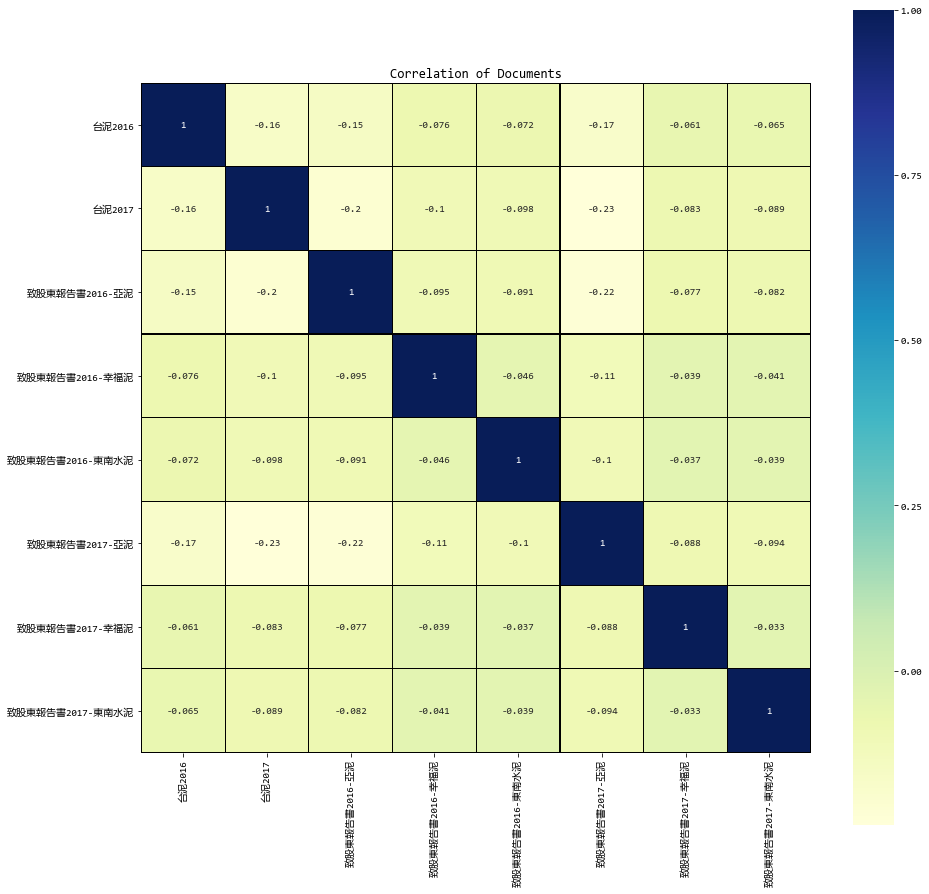

In [19]:
f, ax = plt.subplots(figsize=(15,15))
plt.title('Correlation of Documents', fontsize = 13)
sns.heatmap(data.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

In [20]:
data_std = StandardScaler().fit_transform(data.values)
data_std

array([[-0.34509147, -0.47030831, -0.43399502, ..., -0.49882367,
        -0.17641818, -0.18840869],
       [-0.34509147, -0.47030831, -0.43399502, ..., -0.49882367,
        -0.17641818, -0.18840869],
       [-0.34509147,  0.92891741, -0.43399502, ..., -0.49882367,
        -0.17641818, -0.18840869],
       ...,
       [-0.34509147,  0.92891741, -0.43399502, ..., -0.49882367,
        -0.17641818, -0.18840869],
       [-0.34509147,  0.92891741, -0.43399502, ..., -0.49882367,
        -0.17641818, -0.18840869],
       [-0.34509147,  0.92891741, -0.43399502, ..., -0.49882367,
        -0.17641818, -0.18840869]])

In [21]:
pca = PCA(n_components=7)
x_7d = pca.fit_transform(data_std)
x_7d

array([[ 0.12184057,  0.18209464,  0.57045442, ...,  3.21077152,
        -1.18007642, -0.43541934],
       [ 0.12184057,  0.18209464,  0.57045442, ...,  3.21077152,
        -1.18007642, -0.43541934],
       [ 0.82199608, -0.80949164, -0.32567974, ...,  0.02075401,
        -0.03052797, -0.01713382],
       ...,
       [ 0.82199608, -0.80949164, -0.32567974, ...,  0.02075401,
        -0.03052797, -0.01713382],
       [ 0.82199608, -0.80949164, -0.32567974, ...,  0.02075401,
        -0.03052797, -0.01713382],
       [ 0.82199608, -0.80949164, -0.32567974, ...,  0.02075401,
        -0.03052797, -0.01713382]])

In [22]:
pca4 = PCA(n_components=4)
x_4d = pca.fit_transform(data_std)
x_4d

array([[ 0.12184057,  0.18209464,  0.57045442, ...,  3.21077152,
        -1.18007642, -0.43541934],
       [ 0.12184057,  0.18209464,  0.57045442, ...,  3.21077152,
        -1.18007642, -0.43541934],
       [ 0.82199608, -0.80949164, -0.32567974, ...,  0.02075401,
        -0.03052797, -0.01713382],
       ...,
       [ 0.82199608, -0.80949164, -0.32567974, ...,  0.02075401,
        -0.03052797, -0.01713382],
       [ 0.82199608, -0.80949164, -0.32567974, ...,  0.02075401,
        -0.03052797, -0.01713382],
       [ 0.82199608, -0.80949164, -0.32567974, ...,  0.02075401,
        -0.03052797, -0.01713382]])

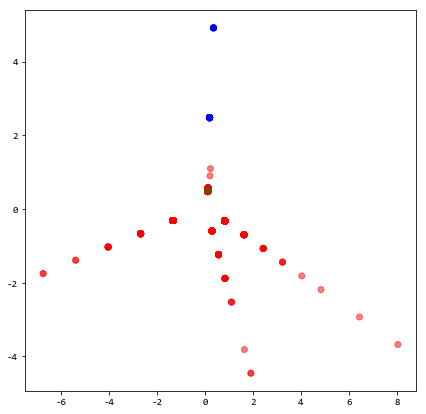

In [23]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_7d[:,0],x_7d[:,2], c= label_color, alpha=0.5) 
plt.show()

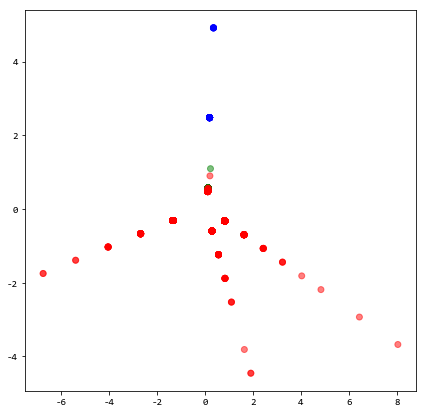

In [24]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_4d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,2], c= label_color, alpha=0.5) 
plt.show()